In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('C:/Users/singhab3/OneDrive - STMicroelectronics/Desktop/Abhishek/images/images.jfif', 0)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

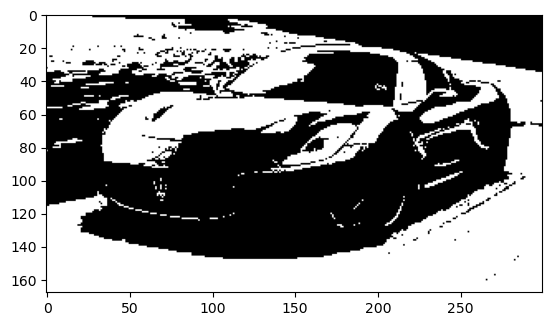

In [65]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

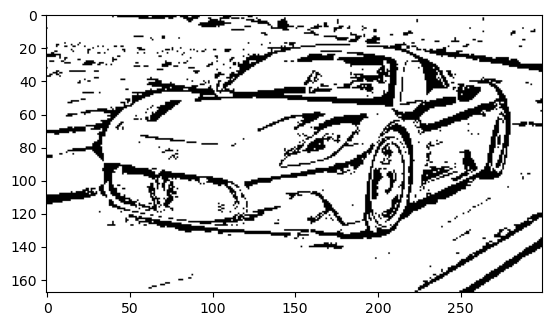

In [66]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25,15)
plt.imshow(th2, cmap='gray')

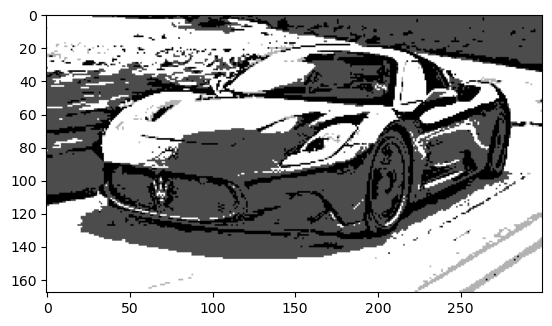

In [67]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
#t = cv2.resize(blended, (128, 128))
plt.imshow(blended, cmap='gray')

In [68]:
img_grey1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_grey2)

error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x062af139::Set<1,-1,-1>,struct cv::impl::A0x062af139::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


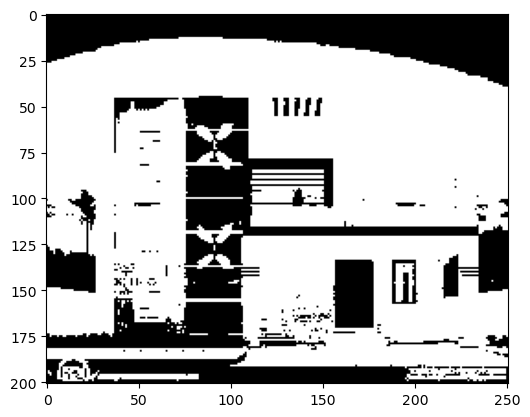

In [85]:
ret, thresh = cv2.threshold(img_grey2, 100, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh, cmap = 'gray')

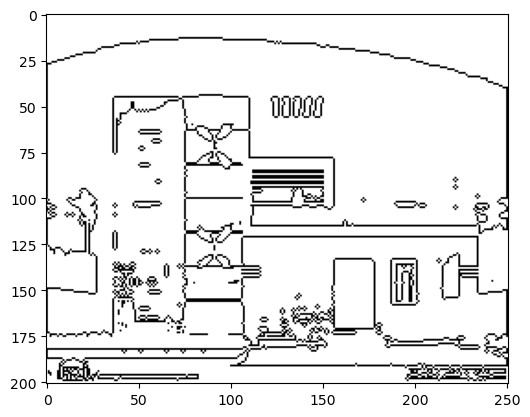

In [87]:
img_contours = np.ones(img.shape)
cv2.drawContours(img_contours, contours, -1, (0,0,0), 0)
plt.imshow(img_contours)

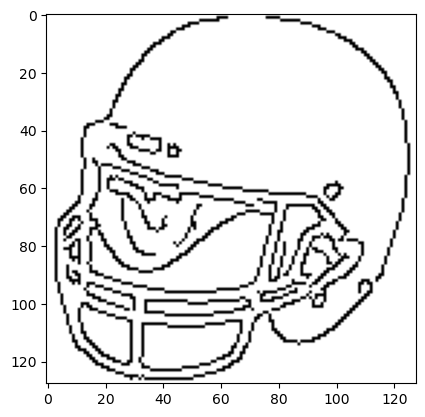

In [79]:
image = cv2.imread('C:/Users/singhab3/Downloads/256_ObjectCategories/076.football-helmet/076_0009.jpg')
image = cv2.resize(image, (128, 128))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edge = 255 - cv2.Canny(blur_image, 30, 150)
plt.imshow(edge, cmap='gray')

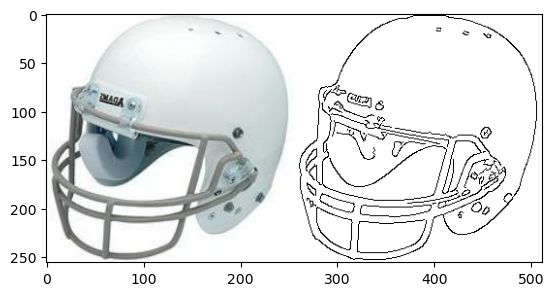

In [5]:
import cv2
image = cv2.imread('C:/Users/singhab3/Downloads/256_ObjectCategories/076.football-helmet/076_0009.jpg')
image = cv2.resize(image, (256, 256))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert into grayscale
## inverted_image = 255 - gray_image # cv2.bitwise_not(gray_image)
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edge = 255 - cv2.Canny(blur_image, 30, 150)
## inverted_blur = 255 - blur_image # cv2.bitwise_not(blur_image)
## sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)
t = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
n_img = cv2.hconcat([image, t])
plt.imshow(n_img)

In [6]:
n_img.shape

(256, 512, 3)

In [74]:
cv2.imshow('image',gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
cv2.imwrite('03_out.jpg',n_img)

True

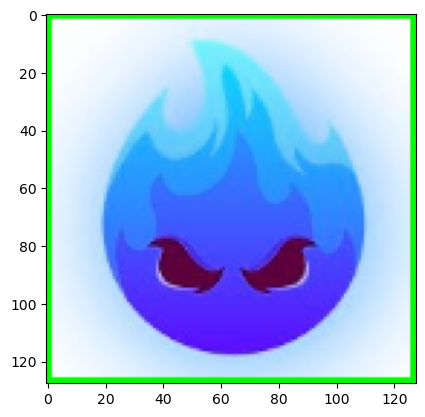

In [66]:
c = cv2.findContours(blur_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
k = cv2.drawContours(image, c[0], -1, (0, 255, 0), 2)
plt.imshow(k)

In [15]:
from sklearn.cluster import KMeans
image1 = cv2.resize(image, (128, 128))
k = KMeans(n_clusters=4)
k.fit(image1.reshape(-1, 3))
seg = k.labels_.reshape(image1.shape[:2])
gray_image = cv2.cvtColor(seg.astype(np.uint8), cv2.COLOR_BGR2GRAY)


c:\Users\singhab3\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x062af139::Set<1,-1,-1>,struct cv::impl::A0x062af139::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [40]:
image = cv2.imread('C:/Users/singhab3/OneDrive - STMicroelectronics/Desktop/Abhishek/images/images.jfif')
image = cv2.resize(image, (128, 128))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 3

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))


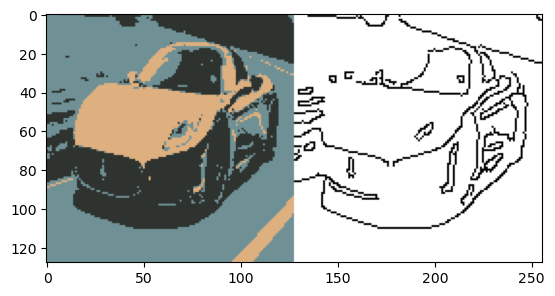

In [41]:
#plt.imshow(segmented_image)
gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edge = 255 - cv2.Canny(blur_image, 30, 150)
t = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
n_img = cv2.hconcat([segmented_image, t])
plt.imshow(n_img)

In [373]:
cv2.imshow('image',n_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [250]:
k = np.array([[-1, -1, -1],
              [-1, 9, -1],
              [-1, -1, -1]])

s_image = cv2.filter2D(edge, -1, k)
#plt.imshow(s_image, cmap = 'gray')

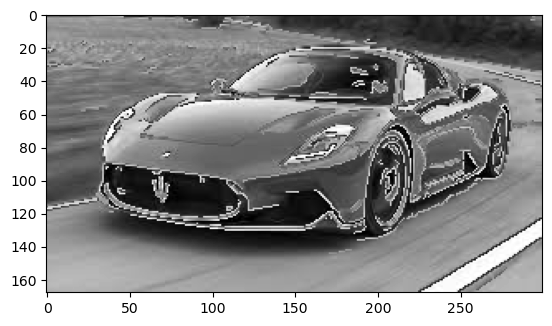

In [217]:
img = cv2.imread('C:/Users/singhab3/OneDrive - STMicroelectronics/Desktop/Abhishek/images/images.jfif', 0)
edged = cv2.Canny(img, 150, 200)
z = cv2.absdiff(edged, img)
plt.imshow(z, cmap = 'gray')

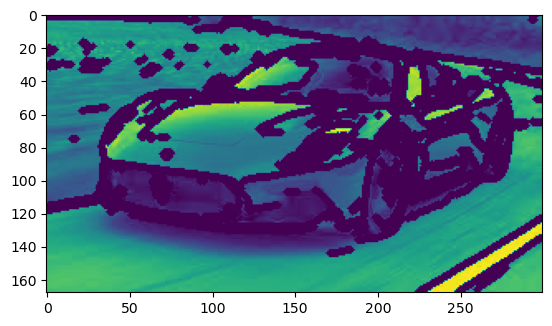

In [149]:
contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(img)

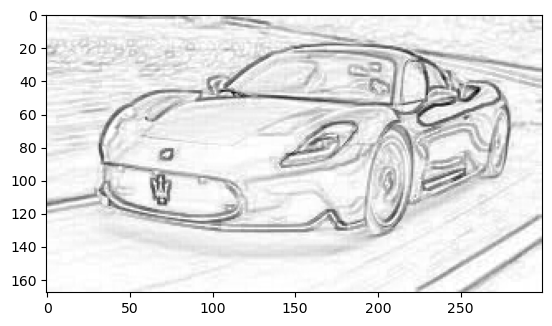

In [213]:
img = cv2.imread('C:/Users/singhab3/OneDrive - STMicroelectronics/Desktop/Abhishek/images/images.jfif', 0)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
t = 255 - cv2.absdiff(img_dilation, img)
plt.imshow(t, cmap = 'gray')

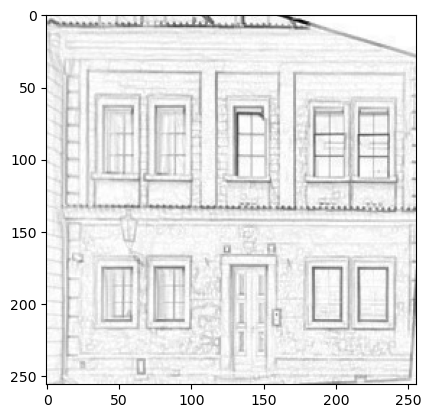

In [378]:
import supervision as sv

ModuleNotFoundError: No module named 'supervision'

In [379]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.
